In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy import sparse 
import matplotlib.pyplot as plt
import torch

In [2]:
scClass_path = !cd ../..;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass
from scClass.main import Model

## Data Collection

In [3]:
data_name = 'PBMC_CITE'
adata = sc.read_h5ad(f'../../../dataset/{data_name}.h5ad')

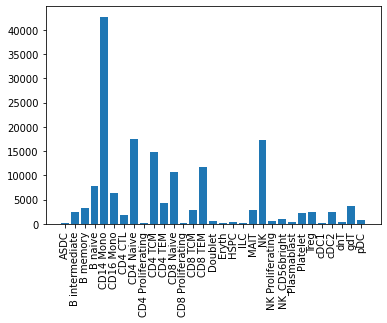

array(['ASDC', 'B intermediate', 'B memory', 'B naive', 'CD14 Mono',
       'CD16 Mono', 'CD4 CTL', 'CD4 Naive', 'CD4 Proliferating',
       'CD4 TCM', 'CD4 TEM', 'CD8 Naive', 'CD8 Proliferating', 'CD8 TCM',
       'CD8 TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK',
       'NK Proliferating', 'NK_CD56bright', 'Plasmablast', 'Platelet',
       'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC'], dtype=object)

In [4]:
# plot cell type distribution
x,y = np.unique(adata.obs['origin cell type'],return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()
label_y=x; label_y

## Dataset Preprocessing

In [5]:
# get gene on model
gene = adata.var['Gene'].values
adata = scClass.transmodel(adata,gene=gene,gene_ref='Gene')

/home/shhsu/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


get gene seq...
0% 24% 48% 72% 96% 
Of 20729 genes in the input file, 20279 were found in the training set of 45468 genes.
mapping to model...
0% 46% 92% 

In [6]:
# Normalized
adata = scClass.normalize_simple(adata)

## Classifier

In [7]:
model = scClass.load()

loading model from:  /home/shhsu/download/scClass_docker/scClass/scClass_modelA/scClass/data/model_train.pkl


0% 6% 12% 18% 24% 30% 37% 43% 49% 55% 61% 68% 74% 80% 86% 92% 98% 

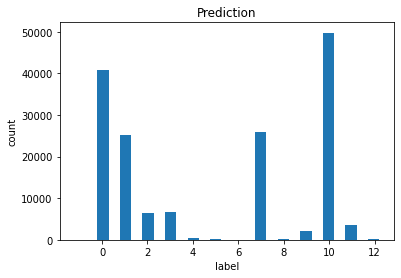

In [8]:
scClass.main.threshold = [np.NAN]*13
y_pred = scClass.predict_batch(adata,model,batch_size=10_000)

In [9]:
scClass.save_predict(y_pred)

label stored in: './output/cell_type_20220306_223422.csv'


## Compare

In [10]:
df = pd.read_excel("../../../dataset/preprocessing/Supplementary table.xlsx", sheet_name=data_name)
trans_table = df[['origin cell type','modelA id']].values.astype(str)
trans_table

array([['ASDC', '11'],
       ['B intermediate', '2'],
       ['B memory', '2'],
       ['B naive', '3'],
       ['CD14 Mono', '10'],
       ['CD16 Mono', '10'],
       ['CD4 CTL', '0'],
       ['CD4 Naive', '0'],
       ['CD4 Proliferating', '0'],
       ['CD4 TCM', '0'],
       ['CD4 TEM', '0'],
       ['CD8 Naive', '1'],
       ['CD8 Proliferating', '1'],
       ['CD8 TCM', '1'],
       ['CD8 TEM', '1'],
       ['Doublet', '-1'],
       ['Eryth', '8'],
       ['HSPC', '12'],
       ['ILC', '-1'],
       ['MAIT', '-1'],
       ['NK', '7'],
       ['NK Proliferating', '7'],
       ['NK_CD56bright', '7'],
       ['Plasmablast', '4'],
       ['Platelet', '9'],
       ['Treg', '0'],
       ['cDC1', '11'],
       ['cDC2', '11'],
       ['dnT', '-1'],
       ['gdT', '-1'],
       ['pDC', '11']], dtype='<U17')

In [11]:
label = adata.obs['modelA id']
anno = adata.obs['origin cell type']

,label
-1,unknown
0,T-helper cell
1,cytotoxic T cell
2,memory B cell
3,naive B cell
4,plasma cell
5,precursor B cell
6,pro-B cell
7,natural killer cell
8,erythrocyte

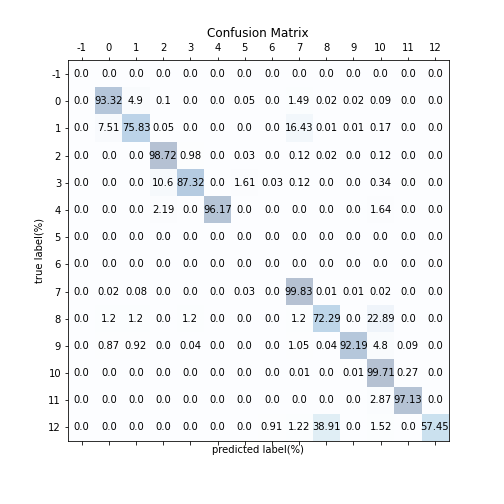

In [12]:
fig = scClass.confusion_matrix(y_pred=y_pred,y_true=label)
scClass.figure_html(fig)

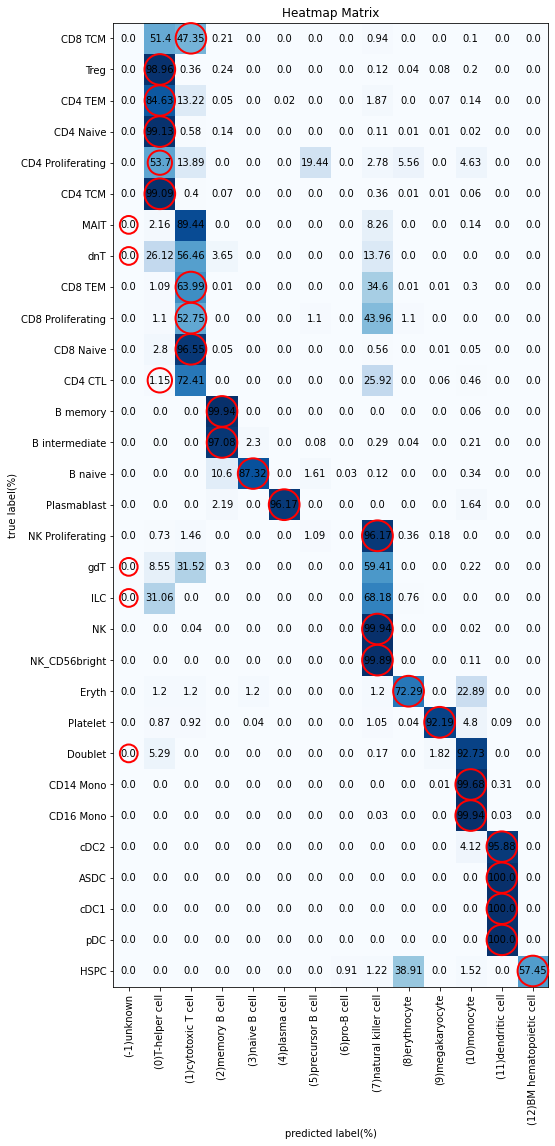

In [13]:
scClass.heatmap_matrix(y_pred=y_pred,y_true=anno,table=trans_table)

In [14]:
scClass.plot_performance(y_pred=y_pred,y_true=label)

,Performance,Value
0,accuary,0.888078
1,precision,0.881785
2,recall,0.863319
3,f1-score,0.856134
